In [93]:
from IPython.display import Image

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [95]:
%matplotlib inline

#Josh Higgins -- Python Cohort -- May 2015

#Data Science and Machine Learning Project

##Goals:

##1.  Explore a real world problem that we might see in the workplace

##2.  Work with data sets that are larger and more complex than we have seen in class.

##3. Learn new techniques for supervised and unsupervised learning.

##4.  Improve visualization abilities and document our process.

#Where to find this kind of data?

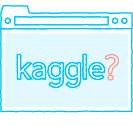

In [118]:
Image(filename='kaggle.png') 

###Kaggle is the world's largest community of data scientists. They offer competitions to solve complex data science problems.

#Challenge: Identify individual users across their digital devices

###As consumers move across devices to complete online tasks, their identity becomes fragmented. Marketers aren't always able to discern when activity on different devices is tied to one user vs. many users.

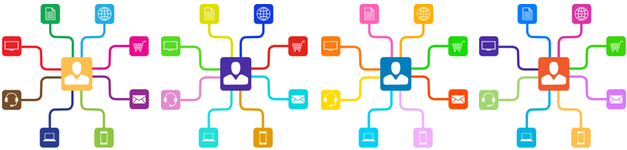

In [97]:
Image(filename='devices.png') 

###Given usage data and a set of fabricated non-personally-identifiable IDs, this competition tasks you with making individual user connections across a variety of digital devices. 

#Summary

In [98]:
dev_basic_train_df = pd.read_csv("dev_train_basic.csv")
dev_basic_test_df = pd.read_csv("dev_test_basic.csv")
cookie_all_basic_df = pd.read_csv("cookie_all_basic.csv")
ipagg_all_df = pd.read_csv("ipagg_all.csv")


###1.  Given a set of mobile devices with descriptive data and a set of non-mobile devices with descriptive data that share ownership, explore the relationships between the mobile and non mobile device data to find features that are predictive of shared ownership. 

###2.  Predict owner relationships between mobile devices and non-mobile devices only given their identifying features.    

###About Features Data:  some describe the device itself: the OS, type of device, model.  Some of the data describe the usage of the device or computer: IP address, websites visited, category of website.

Given 7 different csv files:
1. Training data for devices -- includes unique drawbridge handle and unique device id  
2. Testing data for devices -- our entry to the contest will be our guess of what cookie_ids   are associated with this device.  These have drawbridge handles removed.  
3. Training and testing data for cookie identified devices.  Some with drawbridge handle, some without.  
4. IP table describes the joint behavior of a device or cookie on an IP address. All the info of devices and cookies are merged into one single table, and we can use column 2, a boolean type, to differentiate if it's a device or cookie.  (needs cleaning)
5. IP aggregation table describes the IP behavior and number of devices seen on it.
6. Property observation table provides information regarding website (for cookie) and mobile app (for device) that user has visited before including the specific name of the website or mobile app.
7. Property_category.csv table lists the categorical information of the website/mobile app.


#Data connections

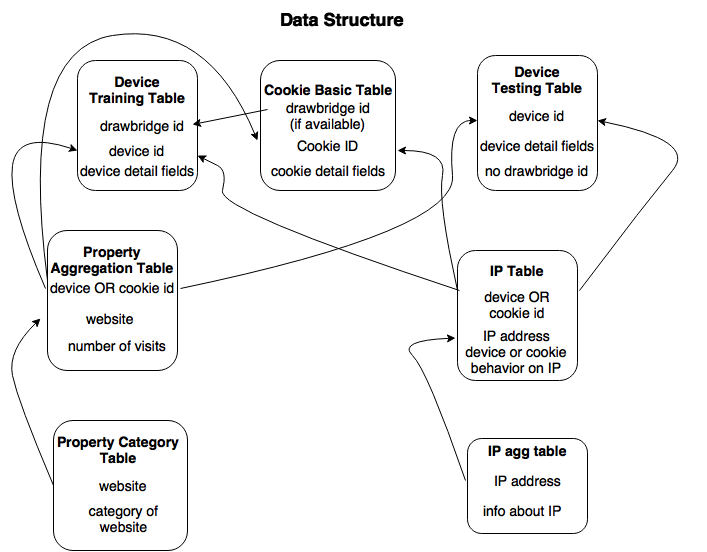

In [99]:
Image(filename='dataconnections.png') 

###There are four different types of data attributes: Index, Categorical, Boolean and Integer 

##Training data for devices

In [100]:
dev_basic_train_df.head(10)

,drawbridge_handle,device_id,device_type,device_os,country,anonymous_c0,anonymous_c1,anonymous_c2,anonymous_5,anonymous_6,anonymous_7
0,handle_292447,id_1000002,devtype_2,devos_138,country_146,1,anonymous_c1_331,anonymous_c2_23084,34,1,204
1,handle_1272807,id_1000061,devtype_2,devos_157,country_146,0,anonymous_c1_1350,anonymous_c2_3147,51,1,203
2,handle_1644226,id_1000068,devtype_2,devos_157,country_146,0,anonymous_c1_1166,anonymous_c2_11093,41,1,204
3,handle_1634852,id_1000149,devtype_4,devos_133,country_146,1,anonymous_c1_1260,anonymous_c2_2456,10,25,198
4,handle_1189159,id_1000202,devtype_4,devos_7,country_146,0,anonymous_c1_917,anonymous_c2_19317,5,1,204
5,handle_1403177,id_1000203,devtype_4,devos_68,country_146,-1,anonymous_c1_679,anonymous_c2_8088,75,1,204
6,handle_710800,id_1000235,devtype_2,devos_72,country_146,0,anonymous_c1_336,anonymous_c2_868,14,1,204
7,handle_1493525,id_1000243,devtype_2,devos_138,country_146,1,anonymous_c1_1179,anonymous_c2_9528,52,74,204
8,handle_312878,id_1000314,devtype_2,devos_138,country_146,1,anonymous_c1_1089,anonymous_c2_23390,3,1,154
9,handle_770055,id_1000317,devtype_4,devos_68,country_146,-1,anonymous_c1_339,anonymous_c2_10927,14,1,202


In [101]:
handles_in_train_data = dev_basic_train_df.groupby('drawbridge_handle').count()
handles_in_train_data = handles_in_train_data['device_type']
handles_in_train_data.shape

(139419,)

In [125]:
dev_basic_train_df.describe()

,anonymous_c0,anonymous_5,anonymous_6,anonymous_7
count,142770.000000,142770.000000,142770.000000,142770.000000
mean,-0.067409,19.795727,30.930497,193.190537
std,0.795113,17.578637,48.322029,15.525353
min,-1.000000,1.000000,0.000000,131.000000
25%,-1.000000,5.000000,1.000000,188.000000
50%,0.000000,14.000000,1.000000,201.000000
75%,1.000000,31.000000,53.000000,204.000000
max,1.000000,151.000000,200.000000,204.000000


In [119]:
handles_in_train_data.head()

drawbridge_handle
handle_1000001    1
handle_1000013    1
handle_1000024    1
handle_1000028    1
handle_1000045    1
Name: device_type, dtype: int64

In [102]:
dev_basic_train_df.shape

(142770, 11)

In [103]:
dev_type = dev_basic_train_df.groupby('device_type').count()

In [104]:
dev_type = dev_type['drawbridge_handle']

In [105]:
dev_type

device_type
-1              50
devtype_1      162
devtype_2    62586
devtype_3       12
devtype_4    72080
devtype_5     4268
devtype_6     1229
devtype_7     2383
Name: drawbridge_handle, dtype: int64

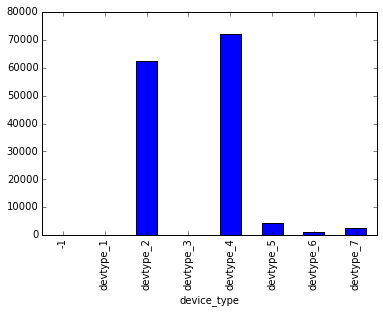

In [106]:
dev_type.plot(kind="bar")

In [107]:
anon_7 = dev_basic_train_df.groupby('anonymous_7').count()
anon_7 = anon_7['drawbridge_handle']
anon_7.tail(20)

anonymous_7
185     1325
186     1339
187     1360
188     1409
189     1507
190     1546
191     1665
192     1885
193     2122
194     2147
195     2341
196     2688
197     2770
198     3210
199     4194
200     5129
201     5592
202     7154
203    10959
204    51262
Name: drawbridge_handle, dtype: int64

##Test Data for Devices

In [108]:
dev_basic_test_df.head()

,drawbridge_handle,device_id,device_type,device_os,country,anonymous_c0,anonymous_c1,anonymous_c2,anonymous_5,anonymous_6,anonymous_7
0,-1,id_1,devtype_2,devos_72,country_146,1,-1,-1,52,1,204
1,-1,id_100002,devtype_4,devos_7,country_146,1,anonymous_c1_322,anonymous_c2_3059,7,1,149
2,-1,id_1000035,devtype_4,devos_68,country_146,-1,anonymous_c1_814,anonymous_c2_1918,17,106,201
3,-1,id_1000099,devtype_2,devos_159,country_146,0,anonymous_c1_736,-1,19,1,203
4,-1,id_1000294,devtype_4,devos_119,country_146,-1,anonymous_c1_261,anonymous_c2_17508,19,147,204


In [109]:
dev_basic_test_df.shape

(61156, 11)

##Training and Test data for cookie_id devices

In [110]:
cookie_all_basic_df.head(10)

,drawbridge_handle,cookie_id,computer_os_type,computer_browser_version,country,anonymous_c0,anonymous_c1,anonymous_c2,anonymous_5,anonymous_6,anonymous_7
0,-1,id_10,computer_os_type_203,computer_browser_version_1158,country_146,1,anonymous_c1_1307,anonymous_c2_18778,15,1,204
1,handle_609762,id_100,computer_os_type_133,computer_browser_version_875,country_146,1,anonymous_c1_753,-1,41,1,204
2,handle_1622320,id_1000,computer_os_type_203,computer_browser_version_36,country_146,0,anonymous_c1_906,anonymous_c2_751,40,140,204
3,-1,id_10000,computer_os_type_203,computer_browser_version_36,country_146,1,anonymous_c1_255,anonymous_c2_2725,34,140,204
4,handle_1286628,id_100000,computer_os_type_203,computer_browser_version_875,country_146,0,anonymous_c1_255,anonymous_c2_235,52,134,204
5,-1,id_1000003,computer_os_type_200,computer_browser_version_683,country_146,0,anonymous_c1_983,-1,23,67,204
6,handle_226230,id_1000006,computer_os_type_203,computer_browser_version_1238,-1,1,-1,-1,1,183,183
7,-1,id_1000007,computer_os_type_133,computer_browser_version_36,country_177,-1,anonymous_c1_431,anonymous_c2_22023,7,141,197
8,handle_15216,id_1000008,computer_os_type_200,computer_browser_version_482,country_146,0,anonymous_c1_1179,anonymous_c2_2683,40,74,204
9,handle_1043549,id_1000009,computer_os_type_133,computer_browser_version_1158,country_146,0,anonymous_c1_1307,anonymous_c2_6720,11,161,203


In [111]:
cookie_all_basic_df.shape

(2175520, 11)

In [112]:
handles_in_cookie_data = cookie_all_basic_df.groupby('drawbridge_handle').count()
handles_in_cookie_data = handles_in_cookie_data['cookie_id']
handles_in_cookie_data.shape

(1555795,)

In [123]:
handles_in_cookie_data.head()

drawbridge_handle
-1              531699
handle_1             1
handle_10            1
handle_1000          1
handle_10000         1
Name: cookie_id, dtype: int64

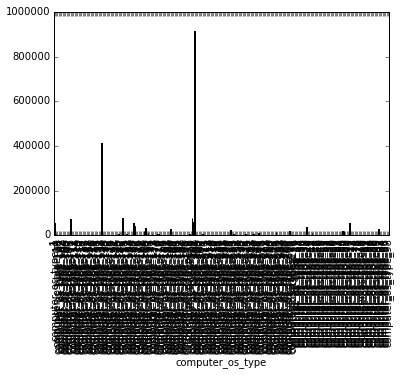

In [114]:
os_type = cookie_all_basic_df.groupby('computer_os_type').count()
os_type = os_type['drawbridge_handle']
os_type.plot(kind="bar")

In [115]:
os_type.shape

(251,)

There are 251 computer OS types.

In [116]:
ipagg_all_df.head(10)

,ip_address,is_cellular_ip,ip_total_freq,ip_anonymous_c0,ip_anonymous_c1,ip_anonymous_c2
0,ip8352948,0,400000,52,5500,27
1,ip4596125,0,802,31,19,10
2,ip19351956,0,400000,52,3726,155
3,ip17464771,0,6577,47,20,17
4,ip14710657,0,5714,52,41,17
5,ip19924303,0,8568,52,23,22
6,ip1244536,0,624,17,13,7
7,ip8860399,0,68,22,34,0
8,ip18387504,0,1111,42,37,20
9,ip9845916,0,1517,27,16,14


In [117]:
ipagg_all_df.shape

(11037814, 6)

##The entry to the contest will be a file that takes the test data with device ID and device info and predicts all the cookie IDs that are related to it.


device_id,cookie_id   
id_1,id_10  
id_100002,id_10 id_20 id_30  
id_1000035,id_10 id_20  
etc.  

#Goals

##1.  Understand data sets and do preliminary analysis and visualization of the data in pandas and matplotlib.

##2.  Use machine learning techniques with scikit-learn to make accurate predictions on the test data.

##3.  Document process and techniques used for presentation.

##4.  Visualize findings and the data.

#Challenges

### Data cleaning -- 3 csv files need to be cleaned before they can be imported to pandas.

###Size of Data -- These are larger data sets than we have worked with before. 

###Using new machine learning techniques 

###Visualization -- Exploring new visualization techniques in bokeh or d3 to visualize the data and our findings

#Take a look at the problem csv files

In [127]:
import csv
import itertools

In [131]:
with open('id_all_ip.csv') as f:
    reader = csv.reader(f)
    for row in itertools.islice(reader, 2):
        print(row)

['device_or_cookie_id', 'device_or_cookie_indicator', '{(ip', 'ip_freq_count', 'idxip_anonymous_c1', 'idxip_anonymous_c2', 'idxip_anonymous_c3', 'idxip_anonymous_c4', 'idxip_anonymous_c5)}']
['id_25644', '1', '{(ip1750664', '18', '0', '1', '1', '0', '1)', '(ip5400336', '38', '0', '6', '1', '0', '1)', '(ip5572833', '8', '0', '8', '1', '0', '1)', '(ip599211', '24', '0', '24', '1', '0', '1)', '(ip8273121', '21', '0', '0', '1', '0', '0)', '(ip13668503', '7', '0', '0', '1', '0', '0)', '(ip15664993', '3', '3', '3', '1', '1', '1)', '(ip17041094', '15', '0', '13', '1', '1', '1)', '(ip4742846', '1', '1', '1', '1', '1', '1)', '(ip14397385', '52', '0', '48', '1', '0', '1)', '(ip16112553', '12', '0', '0', '1', '0', '0)', '(ip13489128', '61', '61', '17', '1', '1', '1)', '(ip4045927', '14', '14', '14', '1', '1', '1)', '(ip7389789', '32', '0', '32', '1', '0', '1)', '(ip6478771', '30', '0', '27', '1', '0', '1)', '(ip12166210', '1', '0', '1', '1', '0', '1)', '(ip17793549', '38', '0', '0', '1', '1', '0)

In [176]:
with open('id_all_ip.csv') as f:
    reader = csv.reader(f)
    row_list = []
    for row in itertools.islice(reader, 2):
        row_list.append(row)

sample_row=row_list[1]

In [177]:
sample_row

['id_25644',
 '1',
 '{(ip1750664',
 '18',
 '0',
 '1',
 '1',
 '0',
 '1)',
 '(ip5400336',
 '38',
 '0',
 '6',
 '1',
 '0',
 '1)',
 '(ip5572833',
 '8',
 '0',
 '8',
 '1',
 '0',
 '1)',
 '(ip599211',
 '24',
 '0',
 '24',
 '1',
 '0',
 '1)',
 '(ip8273121',
 '21',
 '0',
 '0',
 '1',
 '0',
 '0)',
 '(ip13668503',
 '7',
 '0',
 '0',
 '1',
 '0',
 '0)',
 '(ip15664993',
 '3',
 '3',
 '3',
 '1',
 '1',
 '1)',
 '(ip17041094',
 '15',
 '0',
 '13',
 '1',
 '1',
 '1)',
 '(ip4742846',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1)',
 '(ip14397385',
 '52',
 '0',
 '48',
 '1',
 '0',
 '1)',
 '(ip16112553',
 '12',
 '0',
 '0',
 '1',
 '0',
 '0)',
 '(ip13489128',
 '61',
 '61',
 '17',
 '1',
 '1',
 '1)',
 '(ip4045927',
 '14',
 '14',
 '14',
 '1',
 '1',
 '1)',
 '(ip7389789',
 '32',
 '0',
 '32',
 '1',
 '0',
 '1)',
 '(ip6478771',
 '30',
 '0',
 '27',
 '1',
 '0',
 '1)',
 '(ip12166210',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1)',
 '(ip17793549',
 '38',
 '0',
 '0',
 '1',
 '1',
 '0)',
 '(ip20947734',
 '13',
 '0',
 '0',
 '1',
 '0',
 '0)',
 '(ip14701338'

In [178]:
sample_row = [entry.replace('{', '') for entry in sample_row]

In [179]:
sample_row

['id_25644',
 '1',
 '(ip1750664',
 '18',
 '0',
 '1',
 '1',
 '0',
 '1)',
 '(ip5400336',
 '38',
 '0',
 '6',
 '1',
 '0',
 '1)',
 '(ip5572833',
 '8',
 '0',
 '8',
 '1',
 '0',
 '1)',
 '(ip599211',
 '24',
 '0',
 '24',
 '1',
 '0',
 '1)',
 '(ip8273121',
 '21',
 '0',
 '0',
 '1',
 '0',
 '0)',
 '(ip13668503',
 '7',
 '0',
 '0',
 '1',
 '0',
 '0)',
 '(ip15664993',
 '3',
 '3',
 '3',
 '1',
 '1',
 '1)',
 '(ip17041094',
 '15',
 '0',
 '13',
 '1',
 '1',
 '1)',
 '(ip4742846',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1)',
 '(ip14397385',
 '52',
 '0',
 '48',
 '1',
 '0',
 '1)',
 '(ip16112553',
 '12',
 '0',
 '0',
 '1',
 '0',
 '0)',
 '(ip13489128',
 '61',
 '61',
 '17',
 '1',
 '1',
 '1)',
 '(ip4045927',
 '14',
 '14',
 '14',
 '1',
 '1',
 '1)',
 '(ip7389789',
 '32',
 '0',
 '32',
 '1',
 '0',
 '1)',
 '(ip6478771',
 '30',
 '0',
 '27',
 '1',
 '0',
 '1)',
 '(ip12166210',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1)',
 '(ip17793549',
 '38',
 '0',
 '0',
 '1',
 '1',
 '0)',
 '(ip20947734',
 '13',
 '0',
 '0',
 '1',
 '0',
 '0)',
 '(ip14701338',

In [ ]:
sample_dict:

In [132]:
with open('property_category.csv') as f:
    reader = csv.reader(f)
    for row in itertools.islice(reader, 2):
        print(row)

['property_id', '{(category_id)}']
['property_40678', '{(category_82)', '(category_210)', '(category_331)', '(category_279)', '(category_164)', '(category_241)}']


In [133]:
with open('id_all_property.csv') as f:
    reader = csv.reader(f)
    for row in itertools.islice(reader, 2):
        print(row)

['device_or_cookie_id', 'device_or_cookie_indicator', '{(property_id', 'unique_days_seeing_property_on_device_or_cookie_id)}']
['id_558314', '1', '{(property_66021', '7)', '(property_24444', '1)', '(property_285395', '6)', '(property_267459', '1)', '(property_197052', '14)', '(property_132313', '1)', '(property_110400', '1)}']


In [147]:
test_dict = {'test1': (1, 2), 'test2': (1, 2), 'test3': (1, 2)}

In [148]:
test_df = pd.DataFrame.from_dict(test_dict, orient='index')

In [149]:
test_df

,0,1
test1,1,2
test2,1,2
test3,1,2


In [180]:
import csv
from io import StringIO
import subprocess

def fix_bad_csv(input_file, output_file, bad_col):
    with open(input_file) as f_in:
        with subprocess.Popen("gzip -c > %s" % output_file, shell=True, stdin=subprocess.PIPE) as p:
            for line in f_in:
                row = csv.reader(StringIO(line.strip().replace("{", "\"").replace("}", "\""))).__next__()
                for el in csv.reader(StringIO(row[bad_col].replace("(", "\"").replace(")", "\""))).__next__():
                    p.stdin.write(bytes(",".join(row[:bad_col] + el.split(",")) + "\n", "UTF-8"))
            p.communicate()

fix_bad_csv("property_category.csv", "property_category_corrected.csv.gz", 1) # 2nd column
fix_bad_csv("id_all_ip.csv", "id_all_ip.csv.gz", 2) # 3rd column
fix_bad_csv("id_all_property.csv", "id_all_property.csv.gz", 2) # 3rd column

In [183]:
with open('id_all_property 2.csv') as f:
    reader = csv.reader(f)
    for row in itertools.islice(reader, 4):
        print(row)

['device_or_cookie_id', 'device_or_cookie_indicator', 'property_id', 'unique_days_seeing_property_on_device_or_cookie_id']
['id_558314', '1', 'property_66021', '7']
['id_558314', '1', 'property_24444', '1']
['id_558314', '1', 'property_285395', '6']
